# Importing Libraries

In [18]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# Data Pre-Processing

In [19]:
df=pd.read_csv('forestfires.csv')

In [20]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [22]:
df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [23]:
df['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [24]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


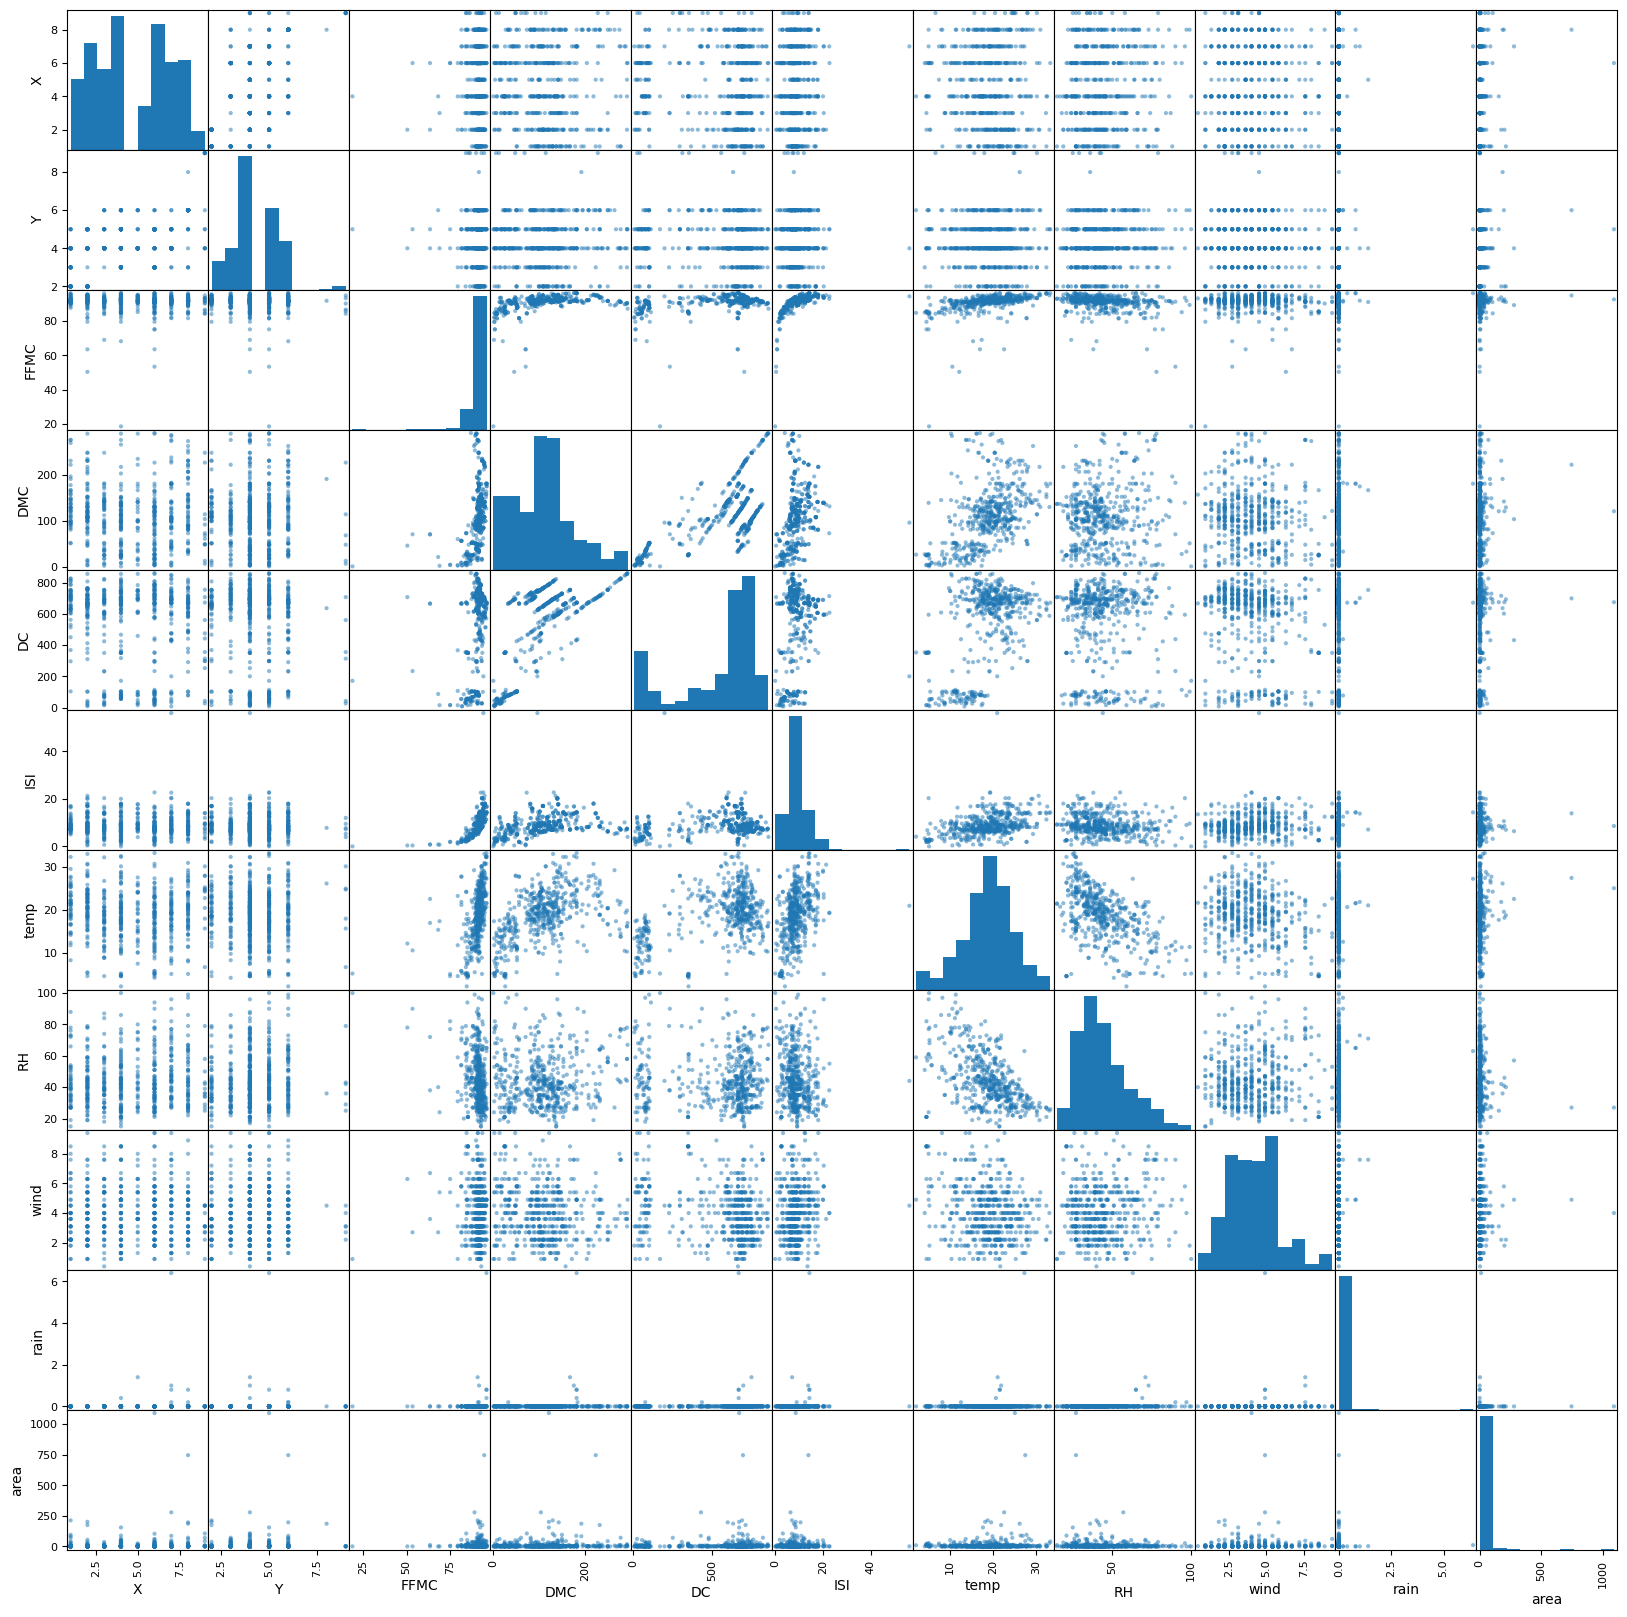

In [25]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20, 20));

C:\Users\omkar\AppData\Local\Temp\ipykernel_34316\730539635.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True,ax=ax)


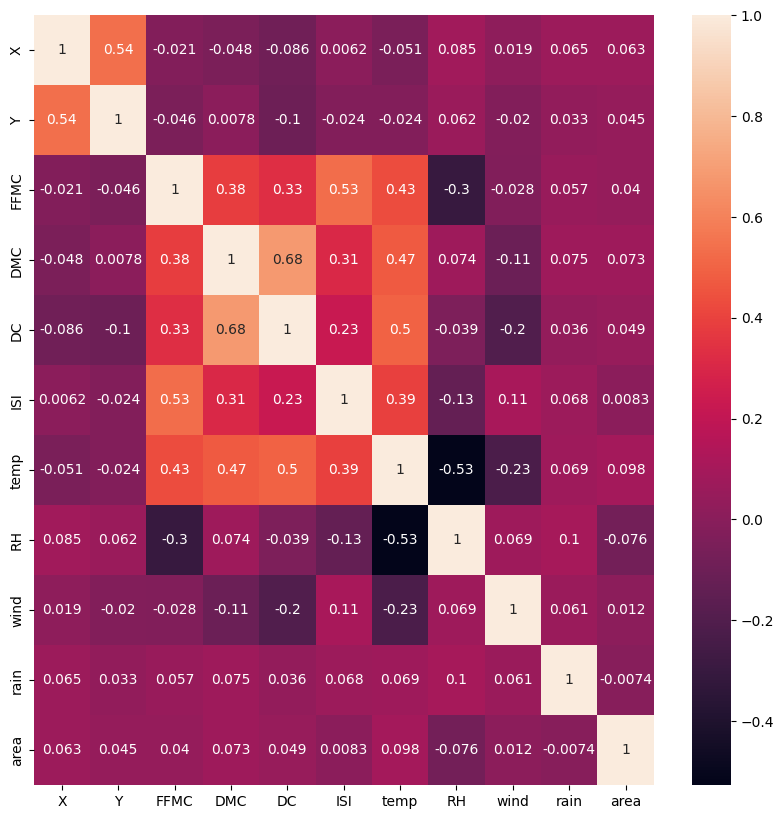

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot = True,ax=ax)
plt.show()

In [27]:
def ordinal_encoding(df,column,ordering):
  df=df.copy()
  df[column]=df[column].apply(lambda x: ordering.index(x))
  return df

In [29]:
X_train,X_test,Y_train,Y_test=preprocessing(df,task='Classification')

In [30]:
def preprocessing(df,task):
  df=df.copy()
  df=ordinal_encoding(
      df,
      column='month',
      ordering=[
                 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'
       ]
  )
  df=ordinal_encoding(
      df,
      column='day',
      ordering=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
  )
  if task=='Regression':
    Y=df['area']
  elif task=='Classification':
    Y=df['area'].apply(lambda x: 1 if x>0 else 0)

  X=df.drop('area',axis=1)

  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.80,shuffle=True,random_state=1)
  # 80 : 20 We have used it; 50:50, 66:34, 70:30, 80:20, 90:10 Commonly Used Once;
  scaler=StandardScaler()
  scaler.fit(X_train)

  X_train=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
  X_test=pd.DataFrame(scaler.transform(X_test),columns=X.columns)

  return X_train,X_test,Y_train,Y_test

In [31]:
Y_train

135    0
218    1
119    0
463    1
42     0
      ..
129    0
144    1
72     0
235    1
37     0
Name: area, Length: 413, dtype: int64

# ML Models

### Machine Learning Models

In [32]:
mname=[]
macc=[]

##### Logistic Regression

In [33]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [34]:
Y_pred_lr.shape

(104,)

In [35]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
mname.append("Logistic Regression")
macc.append(score_lr)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 50.0 %


##### Naive Bayes

In [36]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

In [37]:
Y_pred_nb.shape

(104,)

In [38]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
mname.append("Naive Bayes")
macc.append(score_nb)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 47.12 %


##### SVM

In [39]:
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)

In [40]:
Y_pred_svm.shape

(104,)

In [41]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
mname.append("Simple Vector Machine")
macc.append(score_svm)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 46.15 %


##### K Nearest Neighbours

In [42]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [43]:
Y_pred_knn.shape

(104,)

In [44]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
mname.append("KNN")
macc.append(score_knn)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 44.23 %


##### Decision Tree

In [45]:
max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [46]:
print(Y_pred_dt.shape)

(104,)


In [47]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
mname.append("Decision Tree")
macc.append(score_dt)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 56.73 %


##### XGBoost

In [48]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)

In [49]:
Y_pred_xgb.shape

(104,)

In [50]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
mname.append("XGBoost")
macc.append(score_xgb)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 57.69 %


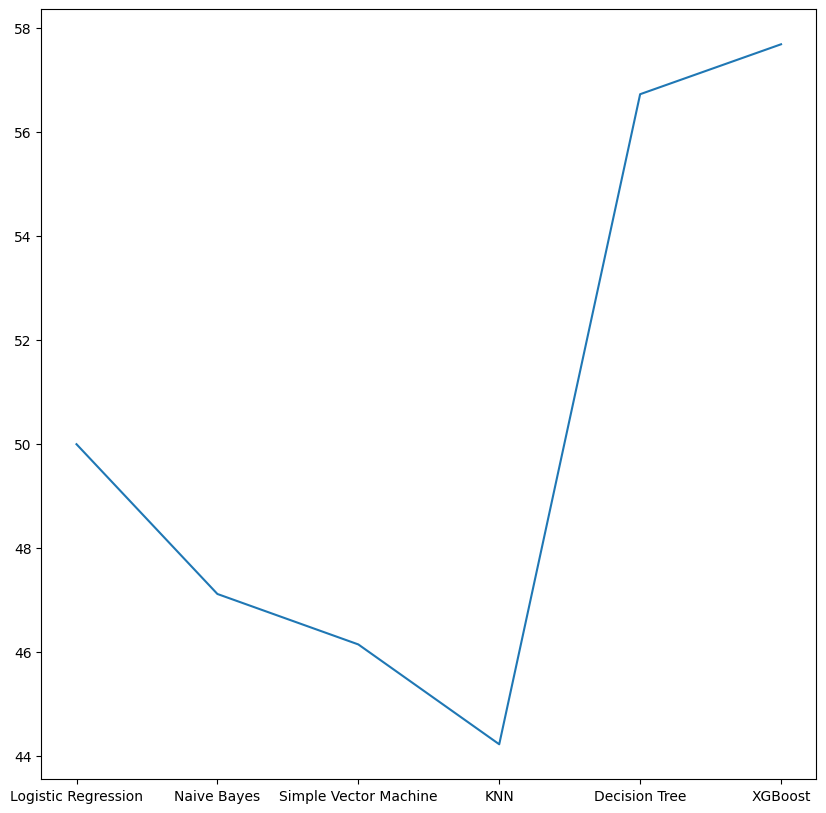

In [51]:
plt.figure(figsize=(10,10)) 
plt.plot(mname, macc)
plt.show()